In [14]:
#-# Open the file
fileToRead = open( "chp1_afternoon.txt", "r" )

#-# Read in the data line by line and put into dateFormatted
rowsInFile = []
for line in fileToRead:
    # Strip off the newline and split based on the space
    rowsInFile.append( line.strip('\n').split('\t') )
    
#-# Close the file
fileToRead.close()

Showcase the column names:

In [15]:
counter = 0
for colNames in rowsInFile[0]:
    print (counter,colNames)
    counter = counter + 1

0 section
1 section_id
2 section_sis_id
3 submitted
4 attempt
5 69200963: Data constitute the building blocks of information.
6 1
7 69200964: The only way to access the data in a database is through the DBMS.
8 1
9 69200967: Data processing can be as simple as organizing data to reveal patterns.
10 1
11 69200971: A data warehouse can store data derived from many sources.
12 1
13 69200973: Corporations use only structured data.
14 1
15 69200981: A(n) _____ database is used by an organization and supports many users across many departments.
16 1
17 69200982: A(n) _____ database supports a relatively small number of users (usually fewer than 50) or a specific department within an organization.
18 1
19 69200983: _____ is defined as the condition in which all of the data in the database are consistent with the real-world events and conditions.
20 1
21 69200984: A workgroup database is a(n) _____ database.
22 1
23 69200985: A desktop database is a _____ database.
24 1
25 "69200986: What data

Showcase the one example:

In [16]:
counter = 0
for colNames in rowsInFile[1]:
    print (counter,colNames)
    counter = counter + 1

0 "IST 210, Section 002: Org Data (21981--UP---P-IST-----210-------002-)"
1 2213391
2 s21981--14303
3 2019-09-09 04:05:16 UTC
4 2
5 TRUE
6 1
7 TRUE
8 1
9 TRUE
10 1
11 TRUE
12 1
13 FALSE
14 1
15 enterprise
16 1
17 workgroup
18 1
19 Data ubiquity
20 0
21 multiuser
22 1
23 single-user
24 1
25 distributed database
26 1
27 Unstructured
28 1
29 Raw data
30 0
31 Data inconsistency
32 1
33 Database Management System (DBMS)
34 1
35 Metadata
36 1
37 A database
38 0
39 Information
40 1
41 Data redundancy
42 1
43 Cloud databases
44 1
45 17
46 3
47 17


Create a subset of the data based on 1st attempts:

In [17]:
firstAttemptData = []
for row in rowsInFile[1:]:
    if (row[4]=="1"):
        firstAttemptData.append(row)

Let's double check the data

In [18]:
for row in firstAttemptData[0:10]:
    print (row[4])

1
1
1
1
1
1
1
1
1
1


Drop the first column (attempt - we know its the first) and last 3 columns (n correct, n incorrect, score). We just want the data.

In [19]:
justTheData = []
for row in firstAttemptData:
    temp = row[5:]
    temp = temp[:-3]
    justTheData.append(temp)
print(len(justTheData[0]))

40


In [20]:
for row in justTheData[0:4]:
    print (row)

['TRUE', '1', 'FALSE', '0', 'TRUE', '1', 'TRUE', '1', 'FALSE', '1', 'enterprise', '1', 'workgroup', '1', 'Data integrity', '1', 'multiuser', '1', 'single-user', '1', 'centralized databases', '0', 'Unstructured', '1', 'Structured data', '1', 'Data Anomalies', '0', 'System Administrator', '0', 'Queries', '0', 'A database', '0', 'Information', '1', 'Data redundancy', '1', 'Cloud databases', '1']
['TRUE', '1', 'FALSE', '0', 'TRUE', '1', 'TRUE', '1', 'TRUE', '0', 'enterprise', '1', 'workgroup', '1', 'Data integrity', '1', 'multiuser', '1', 'single-user', '1', 'distributed database', '1', 'Unstructured', '1', 'Structured data', '1', 'Data inconsistency', '1', 'Database Management System (DBMS)', '1', 'Metadata', '1', 'Knowledge', '1', 'Information', '1', 'Data redundancy', '1', 'Cloud databases', '1']
['TRUE', '1', 'TRUE', '1', 'TRUE', '1', 'TRUE', '1', 'FALSE', '1', 'enterprise', '1', 'workgroup', '1', 'Data anomaly', '0', 'multiuser', '1', 'single-user', '1', 'distributed database', '1', '

Define the data:

In [21]:
possiblePoints = len(justTheData)
points = [0] * 20
for row in justTheData:
    skip = 1
    for point in range(1,len(row),2):
        if (float(row[point])>0):
            skip = 0
    for point in range(1,len(row),2):
        if not (skip):
            points[int(((point-1)/2))] = points[int(((point-1)/2))] + float(row[point])
        
        
        
goodScores = []
for i in range(20):
    goodScores.append(possiblePoints*.75)

print (points)
print (possiblePoints)
print (goodScores)

[44.0, 19.0, 43.0, 44.0, 40.0, 39.0, 37.0, 30.0, 43.0, 41.0, 26.0, 41.0, 37.0, 28.0, 36.0, 24.0, 16.0, 31.0, 39.0, 39.0]
45
[33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75, 33.75]


### Question 1

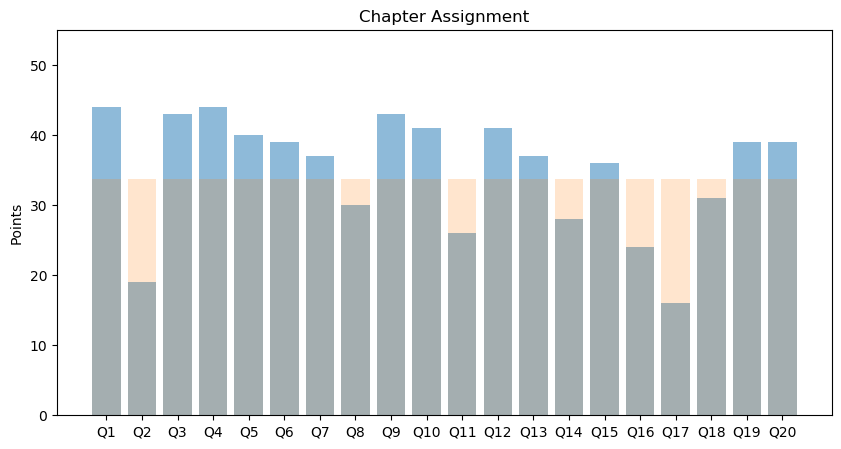

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
namesOFQuestions = []
for i in range(1,21):
    namesOFQuestions.append("Q"+str(i))
objects = tuple( namesOFQuestions )
y_pos = np.arange(20)
performance = [10,8,6,4,2,1]

plt.bar(y_pos, points, align='center', alpha=0.5)
plt.bar(y_pos, goodScores, align='center', alpha=0.2)
plt.ylim(0, possiblePoints+10)
plt.xticks(y_pos, objects)
plt.ylabel('Points')
plt.title('Chapter Assignment')
plt.show()

Print out questions that are less than 75%

In [23]:
for i in range(0,len(points)):
    if (points[i] < possiblePoints*.75):
        print ("Q"+str(i+1),"\t",points[i]/possiblePoints,"\n",rowsInFile[0][(i*2)+5].split(":")[1],"\n")

Q2 	 0.4222222222222222 
  The only way to access the data in a database is through the DBMS. 

Q8 	 0.6666666666666666 
  _____ is defined as the condition in which all of the data in the database are consistent with the real-world events and conditions. 

Q11 	 0.5777777777777777 
  What database provides localized data, but is synchronized together for a more global database system?" 

Q14 	 0.6222222222222222 
  _____ exists when data redundancy occurs and there is a conflict between two data sources.Â  

Q16 	 0.5333333333333333 
  _____ provide a description of the data characteristics and the set of relationships that link the data found within the database. 

Q17 	 0.35555555555555557 
  _____ is the body of information and facts about a specific context. 

Q18 	 0.6888888888888889 
  _____ is the result of revealing the meaning of raw facts. 



Print out questions that are greater than 90%

In [24]:
for i in range(0,len(points)):
    if (points[i] > possiblePoints*.9):
        print ("Q"+str(i+1),"\t",points[i]/possiblePoints,"\n",rowsInFile[0][(i*2)+5].split(":")[1],"\n")

Q1 	 0.9777777777777777 
  Data constitute the building blocks of information. 

Q3 	 0.9555555555555556 
  Data processing can be as simple as organizing data to reveal patterns. 

Q4 	 0.9777777777777777 
  A data warehouse can store data derived from many sources. 

Q9 	 0.9555555555555556 
  A workgroup database is a(n) _____ database. 

Q10 	 0.9111111111111111 
  A desktop database is a _____ database. 

Q12 	 0.9111111111111111 
  _____ data is difficult to compare (between different sources) and difficult to store efficiently.Â  

